# 최적화 알고리즘

딥러닝 모델을 학습시키기 위해 다양한 최적화 이론이 있는데 이를 정리해보고자 함.  
https://arxiv.org/pdf/1609.04747.pdf

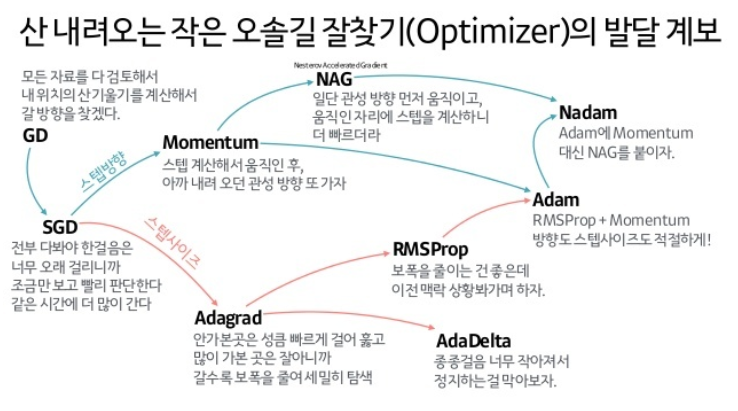

# Stochastic Gradient Descent (SGD)

## Batch gradient descent

$$ θ = θ - η ⋅∇_θJ(θ) $$

경사하강법을 이용한 가장 기본적인 방법, training set의 모든 데이터셋을 이용하여 parameter를 업데이트함.  
데이터셋 전체를 순회 할 때 업데이터가 한 번 이루어지므로 속도가 매우 느리고 메모리가 충분치 않을땐 사용할 수 없고 온라인 상에서 즉석으로 업데이터를 할 수 없다는 것이 단점

## Stochastic Gradient Descent

$$ θ = θ - η ⋅∇_θJ(θ;x^{(i)},y^{(i)}) $$

batch gradient descent와 똑같지만 배치 학습이 각 training sample에 대하여 업데이트가 이루어짐  

batch gradient descent보다 속도가 빠르고 온라인 학습도 가능케 함.

## Mini-batch gradient descent

$$ θ = θ - η ⋅∇_θJ(θ;x^{(i:i+n)},y^{(i:i+n)}) $$

미니 배치 학습을 이용한 경사 하강법, 보통 배치 크기는 50 ~ 256 을 사용하나 task에 따라 또 다르다. 실제로 사용되는 SGD는 이 미니 배치 학습을 말함


# Momentum

http://www.cs.toronto.edu/~hinton/absps/momentum.pdf  

SGD는 global minima를 찾는 협곡 탐색에서 문제가 발생 할 수 있다.

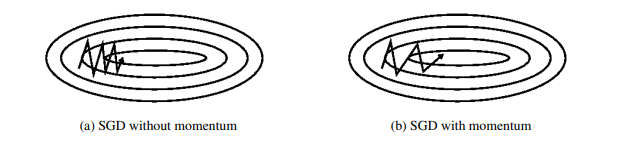

momentum은 이전의 스텝의 관성 방향에 관한 항을 더하여 SGD의 진동을 약화시키고 기울기 방향으로 가속화 시켜준다.

$$ v_t = \mu v_{t-1} - \eta \cdot \nabla_θ J(θ) $$
$$ θ = θ + v_t $$

momentum term $\mu$는 보통 0.9나 그 근처 값을 사용  


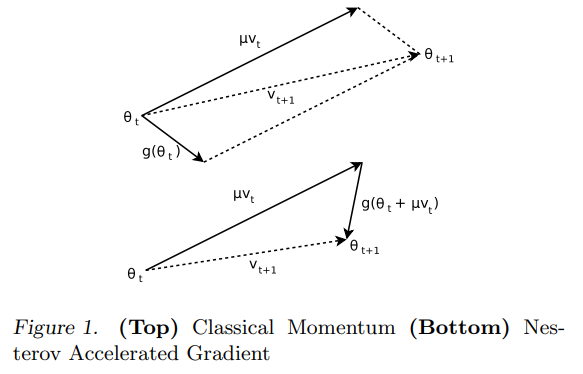

$\mu v_t$와 $-\eta \nabla_\theta J(θ)$가 더해지면서 결국 gradient가 큰 흐름의 방향으로 지속하도록 도와줘 성능을 향상 시킬 수 있음.

## Nesterov accelerated gradient (NAG)

$$ v_t = \mu v_{t-1} - \eta \cdot \nabla_θ J(θ+\mu v_{t-1}) $$
$$ θ = θ + v_t $$

기존의 momentum과는 다르게 gradient를 구할 때 현재 parameter에서 $\mu v_{t-1}$만큼 이동함.  
즉 NAG는 미리 받은 속도에 따라 미리 이동한 후 기울기 구하고 속도를 업데이트 > 파라미터 업데이트를 수행하는데 평균적으로 일반 momentum보다 좋은 성능(빠르고 안정적)을 보인다.

# Adaptive Gradient (Adagrad)


$$ g_{t,i} = \nabla_{θ_t} J(θ_{t,i}) $$
$$ \theta_{t+1, i} = \theta_{t, i} - \frac{\eta} {\sqrt{G_{t,ii} + ϵ}} \cdot g_{t,i} $$
여기서 $G_{t,ii} =  Σ^{t-1}_{i=1}g^2_{t,i}$

Adagrad는 gradient-based 최적화 알고리즘.  

아이디어는 파라미터 별로 학습이 자주 됐다면 학습률을 줄이고 반대로 학습이 덜 됐다면 학습률을 크게 조정하여 파라미터를 업데이트한다.  
학습률은 파라미터에 맞게 각각 수정되므로 보통 0.01을 초깃값으로 놓고 학습을 수행 -> 튜닝 부담 감소  

그러나 학습을 진행하면서 분모의 값이 점점 증가하기 때문에 학습률이 아주 작게 감소하는 문제가 발생  
-> Adadelta, RMSProp 으로 보완


## Root Mean Sqaured Propagation (RMSProp)

$$ E[g^2]_{t,i} = \gamma E[g^2]_{t-1,i} + (1-\gamma)g^2_{t,i} $$
$$ \theta_{t+1, i} = \theta_{t, i} - \frac{\eta} {\sqrt{E[g^2]_{t,i} + ϵ}} \cdot g_{t,i} $$
보통 $\gamma = 0.9 \space $, $\eta = 0.001$로 세팅

학습률을 조정할때 단순히 제곱합을 하지 않고 최근 time step의 기울기를 많이 반영하기 위해 지수 이동 평균을 이용.  
즉 분모가 무한히 커지지 않게 조절할 수 있기 때문에 Adagrad보다 오래 학습 할 수 있음.

## Adaptive Moment Estimation (Adam)

https://arxiv.org/pdf/1412.6980.pdf  

$$ m_t = \beta_1 m_{t-1} + (1-\beta_1)g_t $$
$$ v_t = \beta_2 v_{t-1} + (1-\beta_2)g^2_t $$

$$ m̂_t = \frac{m_t}{1-\beta_1^t} $$
$$ v̂_t = \frac{v_t}{1-\beta_2^t} $$

$$ \theta_{t+1} = \theta_t -\frac{\eta}{\sqrt{v̂_t} + ϵ} m̂_t$$

보통 $\beta_1 = 0.9, \space \beta_2 = 0.999$로 세팅

gradient의 1차 적률, 2차 적률을 추정하여 파라미터를 업데이트  

Adagrad와 똑같이 최근 기울기 반영을 위해 지수 이동 평균을 사용  

$(1-\beta_1^t)$ 등 으로 나누는 이유는 예를 들어 $𝔼[g_t]$를 $𝔼[m_t]$로 나타냈을 때,  
실제로 $(1-\beta_1^t)$만큼 나눠져 있어 그만큼 수정을 해주기 위함.


크고 고차원의 데이터셋에서 간단하고 계산을 효율적으로 할 수 있는 방법이며 적은 메모리를 필요로 함.  
Adagrad, RMSProp의 장점을 모두 가지며 non-convex problem 에서도 최적화가 잘 되는 좋은 방법.

## Adam with decoupled weight decay (AdamW)

https://arxiv.org/pdf/1711.05101.pdf  
https://deep-learning-study.tistory.com/750  


L2 regularization, weight decay regularization 은 기본 SGD 에서는 같지만 Adam 같은 Adaptive gradient algorithm에서는 다르게 적용됌. weight decay regularization의 기본 공식을 회복? 하기위해 간단한 수정을 함 바로 최적화 스텝으로 부터 얻어진 weight decay를 decoupling 하는 것
1. SGD 와 Adam의 lr setting으로 부터 온 weight decay factor의 최적화 선택을 차별화
2. Adam의 일반화 능력 향상 SGD with momentum 보다

### L2 regularization vs weight decay regularization

L2 regularization 와 weight decay regularization 는 손실 함수에 패널티 텀을 더하여 작용을 해서 비슷하다고 생각할 수 있음. 둘의 차이점은 그 텀이 더해진 방식에 있음.  

SGD의 경우  
$$θ=θ−η⋅∇_θJ(θ)$$
L2 규제에 의해 Loss에 $||θ||^2$를 더해 아래 처럼 수정되고
$$ J'(θ) = J(θ) + \frac{1}{2}λ||θ||^2 $$
결국
$$θ=θ−η⋅∇_θJ(θ) - \eta \lambda θ $$
$$\space \space \space \space \space =θ(1- \eta \lambda) −η⋅∇_θJ(θ)$$
이는 가중치에 $(1- \eta \lambda)$를 곱하여 업데이트하는 가중치 감소와 똑같이 작용하게 된다.  
따라서 L2 규제는 Loss에 규제항을 더하는 model-level의 방법이라면 가중치 감소는 optimizer-level의 방법인 느낌  

저자들은
1. Adam 의 weight deca y를 SGD 처럼  L2 regularization 으로 구현하면 parameter와 gradient가 덜 regularized 될 수 있음
2. 딥러닝 라이브러리들은 weight decay를 L2 regularization으로 구현해놨기 때문에 Adam이 SGD with momentum보다 못한 성능을 보일 수 있음
3. weight decay는 SGD, Adam 모두 향상시키지만 L2 는 그렇지 못함
4. 두개 모두 large number of batch 의 경우 optimal weight decay는 작아짐, global learning rate multiplier를 사용하여 성능을 높일 수 있음(Adam)

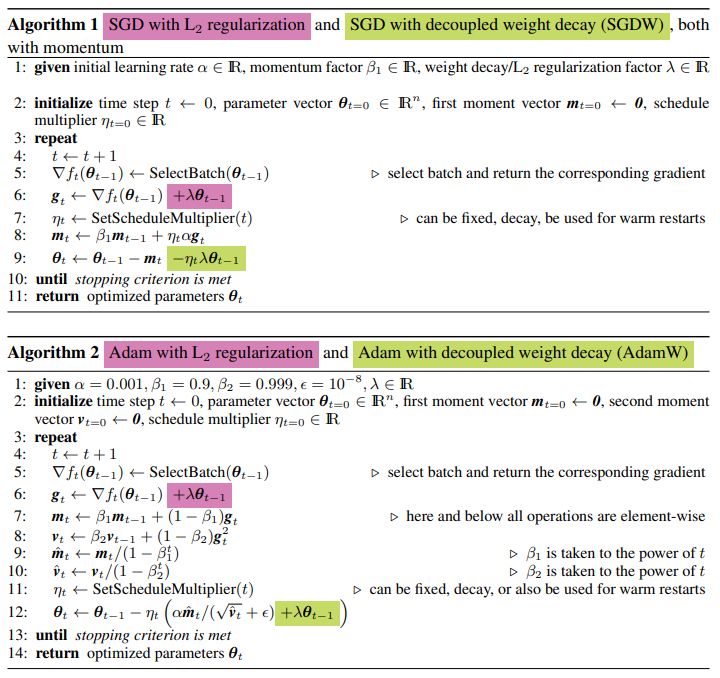

SGD는 두 방법 모두 같은 비율로 파라미터가 감소하지만 Adam의 경우 그렇지 않기 때문에 weight decay를 분리

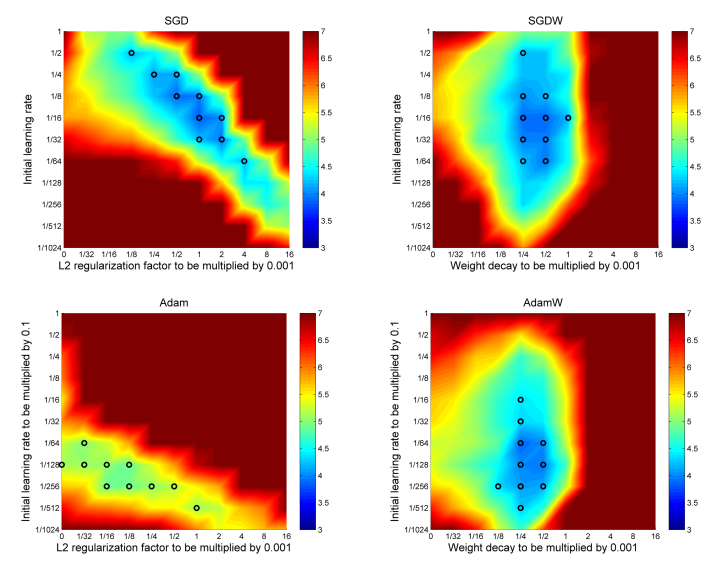

decoupled weight decay를 사용한 경우 SGD, Adam 둘다 weight decay와 learning rate이 서로 독립적으로 되기 때문에 튜닝할때 하나만 바꿔도 좋은 성능을 얻을 가능성이 높아진다.

# 코드 실습

In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
# 함수 정의 <- 이건 안해도 됌 모델로 하장

# 내가 시각화 할 그래프가 Loss 함수
# Loss 함수의 input이 바로 파라미터
# 별다른 인풋없이 그냥 파라미터 초깃값 넣고 업데이트만 계속하기

# https://tutorials.pytorch.kr/beginner/examples_autograd/polynomial_custom_function.html
# class my_function(torch.autograd.Function):
#   '@staticmethod'
#   def forward(ctx, inputs):
#     ctx.save_for_backward(inputs)
#     return inputs[0]**2 - inputs[1]**2
#   def backward(ctx, grad_output):
#     inputs, = ctx.saved_tensors
#     return 2*grad_output*inputs[0], -2*grad_output*inputs[1]

In [2]:
def select_optim(model, lr, idx):
  optimizers = [torch.optim.SGD(model.parameters(), lr = lr, momentum=0),
                torch.optim.SGD(model.parameters(), lr = lr, momentum=0.9),
                torch.optim.SGD(model.parameters(), lr = lr, momentum=0.9, nesterov=True),
                torch.optim.Adagrad(model.parameters(), lr = lr),
                torch.optim.RMSprop(model.parameters(), lr = lr, alpha=0.9),
                torch.optim.Adam(model.parameters(), lr = lr, betas=(0.9,0.999)),
                torch.optim.AdamW(model.parameters(), lr =lr, betas=(0.9,0.999), weight_decay=0.001)]
  return optimizers[idx]

In [3]:
def Navigating_f(x0 , y0 , n_steps = 30,
                 n_optimizers = 7, lr = 0.01):
  Xs, Ys = [], []
  for i in range(n_optimizers):
    # model & optimizer
    model = my_model(x0,y0).to(device)
    optimizer = select_optim(model, lr, i)

    X,Y = [],[]
    for step in range(n_steps):
      X.append(model.get_parameter('x').item())
      Y.append(model.get_parameter('y').item())
      optimizer.zero_grad()
      loss = model()
      loss.backward()
      optimizer.step()
    Xs.append(X)
    Ys.append(Y)
  return Xs, Ys

In [4]:
def Plotting_f(Xs, Ys, plot_range = 0.6, transpose = False,
               alpha = 0.5, R = 204, G = 204, B = 204):

  # Make scatter object
  scatters = []
  for c,(X,Y) in enumerate(zip(Xs, Ys)):
    Z = [my_function_np(X[i],Y[i]) for i in range(len(X))]
    df = pd.DataFrame({'x':X, 'y':Y, 'z':Z})
    scatter = go.Scatter3d(x = df.x,
                           y = df.y,
                           z = df.z,
                           mode = "markers",
                           name = names[c],
                           marker = dict(size=[5]*len(df),
                                         sizemode='diameter',
                                         color = palette[c],
                                         line = dict(width = 0)))
    scatters.append(scatter)

  # Make surface object
  xs = np.linspace(-plot_range, plot_range,100)
  ys = np.linspace(-plot_range, plot_range,100)
  xx,yy = np.meshgrid(xs,ys)
  zz = my_function_np(xx,yy)
  if transpose:
    zz = zz.T
  cmap = 'rgba(%d,%d,%d,%f)'%(R,G,B,alpha)
  surface = go.Surface(x = xs, y = ys, z = zz,
                       colorscale = [[0, cmap], [1, cmap]],
                       showscale=False)

  fig = go.Figure([*scatters, surface])
  fig.show()

In [5]:
# color & label
palette = ['rgba(255, 0, 0, 1)',
           'rgba(255, 255, 0, 1)',
           'rgba(0, 255, 0, 1)',
           'rgba(0, 255, 255, 1)',
           'rgba(0, 0, 255, 1)',
           'rgba(255, 0, 255, 1)',
           'rgba(64, 64, 64, 1)']
names = ['SGD', 'Momentum', 'NAG', 'Adagrad',
         'RMSProp', 'Adam','AdamW']

## 시각화

In [8]:
# 함수 정의
def my_function(x,y):
  return 1*(x**2 - y**2)
def my_function_np(x,y):
  return 1*(x**2 - y**2)

# 모델 정의
class my_model(nn.Module):
  def __init__(self,x,y):
    super(my_model, self).__init__()
    self.x = nn.parameter.Parameter(data=torch.tensor(x, dtype = dtype), requires_grad=True)
    self.y = nn.parameter.Parameter(data=torch.tensor(y, dtype = dtype), requires_grad=True)

  def forward(self):
    return my_function(self.x, self.y)

# 시각화
Xs, Ys = Navigating_f(x0 = 0.5, y0 = 0.00001, n_optimizers = 7, n_steps = 30, lr = 0.05)
Plotting_f(Xs, Ys)

In [10]:
# 함수 정의
def my_function(x,y):
  return 0.01*(torch.exp(-(y+1)**2-x**2)*(x-1)**2 - torch.exp(-(x+1)**2-y**2)/3 + \
  torch.exp(-x**2-y**2)*(10*x**3-2*x+10*y**5))

def my_function_np(x,y):
  return 0.01*(np.exp(-(y+1)**2-x**2)*(x-1)**2 - np.exp(-(x+1)**2-y**2)/3 + \
  np.exp(-x**2-y**2)*(10*x**3-2*x+10*y**5))


# 모델 정의
class my_model(nn.Module):
  def __init__(self,x,y):
    super(my_model, self).__init__()
    self.x = nn.parameter.Parameter(data=torch.tensor(x, dtype = dtype), requires_grad=True)
    self.y = nn.parameter.Parameter(data=torch.tensor(y, dtype = dtype), requires_grad=True)

  def forward(self):
    return my_function(self.x, self.y)

# 시각화
Xs, Ys = Navigating_f(x0 = 0.09, y0 = 1.24, n_optimizers = 7, n_steps = 500, lr = 0.5)
Plotting_f(Xs, Ys, plot_range=3, alpha=0.5, transpose=False)

In [ ]:
# 함수 정의
def my_function(x,y):
  return -1/(x**2 + 1) * torch.cos(x) * 1/(y**2 + 1) * torch.cos(y)

def my_function_np(x,y):
  return -1/(x**2 + 1) * np.cos(x) * 1/(y**2 + 1) * np.cos(y)

# 모델 정의
class my_model(nn.Module):
  def __init__(self,x,y):
    super(my_model, self).__init__()
    self.x = nn.parameter.Parameter(data=torch.tensor(x, dtype = dtype), requires_grad=True)
    self.y = nn.parameter.Parameter(data=torch.tensor(y, dtype = dtype), requires_grad=True)

  def forward(self):
    return my_function(self.x, self.y)

# 시각화
Xs, Ys = Navigating_f(x0 = 0.06, y0 = 2.6, n_optimizers = 7, n_steps = 100, lr = 0.1)
Plotting_f(Xs, Ys, plot_range=6, alpha=0.5, transpose=False)

In [ ]:
# 함수 정의
def my_function(x,y):
  return  0.001 * torch.cos(x) * torch.cos(y)

def my_function_np(x,y):
  return 0.001 * np.cos(x) * np.cos(y)

# 모델 정의
class my_model(nn.Module):
  def __init__(self,x,y):
    super(my_model, self).__init__()
    self.x = nn.parameter.Parameter(data=torch.tensor(x, dtype = dtype), requires_grad=True)
    self.y = nn.parameter.Parameter(data=torch.tensor(y, dtype = dtype), requires_grad=True)

  def forward(self):
    return my_function(self.x, self.y)

# 시각화
Xs, Ys = Navigating_f(x0 = 0.09, y0 = 1.24, n_optimizers = 7, n_steps = 50, lr = 0.1)
Plotting_f(Xs, Ys, plot_range=6, alpha=0.5, transpose=False)